<div class="alert alert-block alert-info">
<center>MÉTODOS NUMÉRICOS</center>
<center>LISTA 6 a</center>
<center>ALUNO: JONATAS DA SILVA DUARTE</center>
</div>


In [11]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

np.__version__

'1.20.1'

1. Implemente o método da Bisseção descrito pelo algoritmo 1.1 no texto. Para testar o algoritmo, use os exemplos do material textual.

In [12]:
def bissec(f, a, b, tt = 1e-15):
    x_ant = a
    if np.sign(f(a)) * np.sign(f(b)) != -1:
        return
    else:
        while(1):
            x = (a + b) / 2
            if np.abs((x - x_ant) / x) < tt:
                break
            if f(x) == 0:
                return x
            elif np.sign(f(a)) * np.sign(f(x)) == -1:
                b = x
            else:
                a = x
                
            x_ant = x

    return x

In [16]:
## Testando
a = 0
b = 1
f = lambda i: 2 - np.exp(i)
print('A = ', a, '\nB = ', b, '\nF = ', f)

A =  0 
B =  1 
F =  <function <lambda> at 0x0000028946182430>


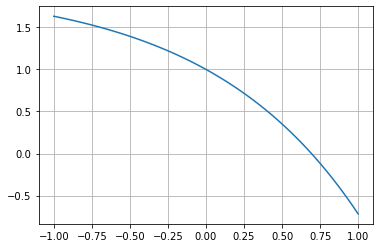

In [17]:
## Graficamente
x = np.linspace(-1, 1)
plt.grid()
plt.plot(x, f(x))

In [19]:
bissec(f, a, b)

0.6931471805599454

In [21]:
f(bissec(f, a, b))

0.0

2. Determine as raízes reais de f (x) = −0.5x² + 2.5x + 4.5:

In [22]:
f = lambda x: -0.5 * x ** 2 + 2.5 * x + 4.5
f

<function __main__.<lambda>(x)>

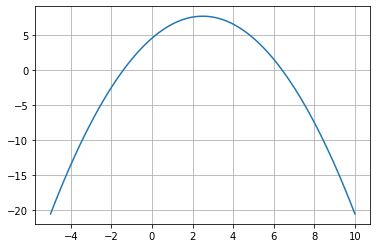

In [24]:
## Graficamente;
fun = np.linspace(-5, 10, 100)
plt.grid()
plt.plot(fun, f(fun))

In [25]:
## Usando a fórmula quadrática;
a = -0.5
b = 2.5
c = 4.5
print('A = ', a, '\nB = ', b, '\nC = ', c)

A =  -0.5 
B =  2.5 
C =  4.5


In [37]:
def raizes(a, b, c):
    D = (b**2 - 4*a*c)
    x1 = (-b + D**(1/2)) / (2*a)
    x2 = (-b - D**(1/2)) / (2*a)

    print('Para: a =',a,'; b =',b,'; c =',c)
    print('\nValor de x1: {0}'.format(x1))
    print('Valor de x2: {0}'.format(x2))
    
raizes(a,b,c)

Para: a = -0.5 ; b = 2.5 ; c = 4.5

Valor de x1: -1.405124837953327
Valor de x2: 6.405124837953327


In [38]:
## Usando três iterações do método da bisseção para determinar a maior raiz
def new_bissec(f, a, b, n):
    if n == 0:
        return

    if np.sign(f(a)) * np.sign(f(b)) != -1:
        return
    else:
        for i in range(2, n + 1):
            x = (a + b) / 2

            if f(x) == 0:
                return x
            else:
                if np.sign(f(a)) * np.sign(f(x)) == -1:
                    b = x
                else:
                    a = x

    return (a + b) / 2

In [41]:
## Testando
x1 = 5
xu = 10
res = []

for i in range(1, 4):
    res.append(new_bissec(f, x1, xu, i))

res

[7.5, 6.25, 6.875]

In [48]:
## Erros relativoss nas iteraçõess
def erro_rel(l):
    for i in range(len(l) - 1):
        err = np.abs((res[i + 1] - res[i]) / res[i + 1])

        print('Erro nas iterações', i + 1, 'e', i + 2,':', err)
              
erro_rel(res)

Erro nas iterações 1 e 2 : 0.2
Erro nas iterações 2 e 3 : 0.09090909090909091


In [51]:
## Comparando com os valores do item b
raizes(a,b,c)

Para: a = -0.5 ; b = 2.5 ; c = 4.5

Valor de x1: -1.405124837953327
Valor de x2: 6.405124837953327


In [56]:
def err_comparando(x):
    for i in range(len(res)):
        e = np.abs((x - res[i]) / x)

        print('Erro na iteração', i + 1,':', e)
        
## P/ x1
err_comparando(-1.405124837953327)

Erro na iteração 1 : 6.337604031627773
Erro na iteração 2 : 5.448003359689811
Erro na iteração 3 : 5.892803695658793


In [57]:
## P/ x2
err_comparando(6.405124837953327)

Erro na iteração 1 : 0.17093736496110604
Erro na iteração 2 : 0.024218862532411636
Erro na iteração 3 : 0.0733592512143472


3. Localize a primeira raiz não-trivial de sin x = x³, onde x está em radianos. Use uma técnica gráfica e a bisseção com o intervalo inicial de 0, 5 a 1. Faça os cálculos até que o erro seja inferior a 2%.

In [58]:
## Graficamente
f = lambda x: -x ** 3 + np.sin(x)
f

<function __main__.<lambda>(x)>

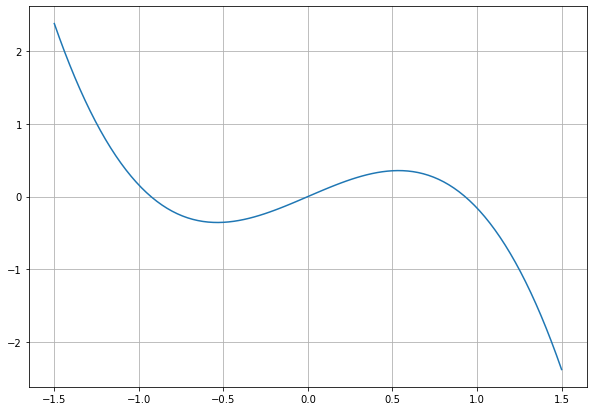

In [61]:
x = np.linspace(-1.5, 1.5, 100)
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(x, f(x))

In [65]:
## Com a formula usada anteriormente, temos que:
print('Primeira raíz é em 𝑥 ~=',bissec(f, 0.5, 1, 0.02))

Primeira raíz é em 𝑥 ~= 0.921875


4. Dada f (x) = −2x^6 − 1.5x^4 + 10x + 20, encontre o máximo dessa função ( f0(x) = 0) usando o método da bisseção, considerando o intervalo [0, 1] e um erro limite de 5%.

In [67]:
x = lambda x: -12 * x ** 5 - 6 * x ** 3 + 10
x

<function __main__.<lambda>(x)>

In [68]:
bissec(x, 0, 1, 0.05)

0.84375

5. (texto grande) 

In [69]:
## falsa possição
def pos_falsa(f, a, b, n):
    if n == 0:
        return

    if np.sign(f(a)) * np.sign(f(b)) != -1:
        return
    else:
        for i in range(2, n + 1):
            x = b - (f(b) * (a - b)) / (f(a) - f(b))

            if f(x) == 0:
                return x
            else:
                if np.sign(f(a)) * np.sign(f(x)) == -1:
                    b = x
                else:
                    a = x

    return b - (f(b) * (a - b)) / (f(a) - f(b))

In [70]:
x = lambda x: 2 - np.exp(x)
x

<function __main__.<lambda>(x)>

In [94]:
pos_falsa(x, 0, 1,1)

0.5819767068693265

In [95]:
## Listas
l1 =[]
l2 =[]

for i in range(20):
    # Lista 1 com valores da falsa posicao
    l1.append(pos_falsa(x, 0, 1, i + 1))
    
    # Lista 2 com valores da new_bissec, usada na questao 2
    l2.append(new_bissec(x, 0, 1, i + 1))
    
print('Lista 1 = {',l1,'}\n\nLista 2 = {',l2,'}')

Lista 1 = { [0.5819767068693265, 0.6766927037604051, 0.690745633944098, 0.6927974084413779, 0.6930962538194726, 0.6931397659701672, 0.6931461010527422, 0.6931470233921544, 0.6931471576775495, 0.6931471772284483, 0.6931471800749055, 0.6931471804893273, 0.6931471805496638, 0.6931471805584484, 0.6931471805597273, 0.6931471805599135, 0.6931471805599406, 0.6931471805599446, 0.6931471805599452, 0.6931471805599453] }

Lista 2 = { [0.5, 0.75, 0.625, 0.6875, 0.71875, 0.703125, 0.6953125, 0.69140625, 0.693359375, 0.6923828125, 0.69287109375, 0.693115234375, 0.6932373046875, 0.69317626953125, 0.693145751953125, 0.6931610107421875, 0.6931533813476562, 0.6931495666503906, 0.6931476593017578, 0.6931467056274414] }


In [96]:
# Comparando
def err(lista):
    for i in range(len(lista) - 1):
        print(i+1,'°:',np.abs((lista[i + 1] - lista[i]) / lista[i + 1]))
        
        
# P/ LISTA 1
err(l1)

1 °: 0.1399689938501458
2 °: 0.020344580541829693
3 °: 0.0029615793481327724
4 °: 0.0004311744241118024
5 °: 6.277543553390576e-05
6 °: 9.139606448552753e-06
7 °: 1.3306547976871543e-06
8 °: 1.9373288002344258e-07
9 °: 2.8205984863091844e-08
10 °: 4.106569662108366e-09
11 °: 5.97884319306425e-10
12 °: 8.70471889034295e-11
13 °: 1.2673395934419947e-11
14 °: 1.8451736661979727e-12
15 °: 2.6860731234489315e-13
16 °: 3.908180334654226e-14
17 °: 5.7661677068668575e-15
18 °: 8.008566259537296e-16
19 °: 1.6017132519074588e-16


In [97]:
# P/ LISTA 2
err(l2)

1 °: 0.3333333333333333
2 °: 0.2
3 °: 0.09090909090909091
4 °: 0.043478260869565216
5 °: 0.022222222222222223
6 °: 0.011235955056179775
7 °: 0.005649717514124294
8 °: 0.0028169014084507044
9 °: 0.0014104372355430183
10 °: 0.0007047216349541931
11 °: 0.0003522367030644593
12 °: 0.00017608733932030288
13 °: 8.805142203046579e-05
14 °: 4.402764936380047e-05
15 °: 2.201334008409096e-05
16 °: 1.1006791190164331e-05
17 °: 5.503425882611926e-06
18 °: 2.7517205132509103e-06
19 °: 1.3758621496195053e-06


Quando comparamos, vemos que o método da falsa posição nos retorna o resultado com menos iterações, validando sua eficiencia.